# Align and plot Fat2, Lar, and Sema5c-3xGFP distributions along filopodia

* Protrusion tip marker Abi-mCherry is used to register different filopodia traces


In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Set locations

In [2]:
DATA_DIR = "../data/distribution_along_filopodia/traces/"
OUT_DIR = "../data/distribution_along_filopodia/"
PLOT_OUT_DIR = "../plots/distribution_along_filopodia/"

OUTPUT_PLOT = True

## Set colors

In [3]:
# Set colors
c_Fat2 = "#1AC1BC"
c_Lar = "#1AC1BC"
c_Sema5c = "#1AC1BC"
c_Abi = "#EA0A0A"
c_phal_line = "#FFA500"
c_phal_fill = "#FFDA00"
c_Lar_alt = "#1C3FB8"
c_Sema5c_alt = "#007f00"


## Get paths to each trace

In [4]:
# Function to import all csv files in a folder containing a certain str/basename
def get_files(data_dir, basename, ch1, ch2, ch3):
    file_names = sorted(os.listdir(data_dir))
    file_names_csv = [name for name in file_names if '.csv' in name]
    file_names_basename = [name for name in file_names_csv if basename in name]
    ch1_key = f'{ch1}.csv'
    ch2_key = f'{ch2}.csv'
    ch3_key = f'{ch3}.csv'
    file_names_ch1 = [name for name in file_names_basename if ch1_key in name]
    file_names_ch2 = [name for name in file_names_basename if ch2_key in name]
    file_names_ch3 = [name for name in file_names_basename if ch3_key in name]
    return file_names_ch1, file_names_ch2, file_names_ch3

Fat2_files_ch1,  Fat2_files_ch2, Fat2_files_ch3 = get_files(DATA_DIR, "Fat2_Abi_phal", "Fat2", "Abi", "phal")
Lar_files_ch1,  Lar_files_ch2, Lar_files_ch3 = get_files(DATA_DIR, "Lar_Abi_phal", "Lar", "Abi", "phal")
Sema5c_files_ch1,  Sema5c_files_ch2, Sema5c_files_ch3 = get_files(DATA_DIR, "Sema5c_Abi_phal", "Sema5c", "Abi", "phal")

if len(Fat2_files_ch1) != len(Fat2_files_ch2):
    print("Number of files differs across channels")
if len(Fat2_files_ch1) != len(Fat2_files_ch3):
    print("Number of files differs across channels")

if len(Lar_files_ch1) != len(Lar_files_ch2):
    print("Number of files differs across channels")
if len(Lar_files_ch1) != len(Lar_files_ch3):
    print("Number of files differs across channels")
    
if len(Sema5c_files_ch1) != len(Sema5c_files_ch2):
    print("Number of files differs across channels")
if len(Sema5c_files_ch1) != len(Sema5c_files_ch3):
    print("Number of files differs across channels")

## Import the traces, store as lists of arrays


In [5]:
# Function to import and store trace data
def import_traces(data_dir, file_ls):
    trace_ls = []
    trace_dist_ls = []
    trace_lens = []
    for i in range(len(file_ls)):
        trace_distances = np.genfromtxt(data_dir + file_ls[i], delimiter=',')[1:,0]
        trace_intensities = np.genfromtxt(data_dir + file_ls[i], delimiter=',')[1:,1]
        
        trace_ls.append(trace_intensities)
        trace_dist_ls.append(trace_distances)
        trace_lens.append(len(trace_intensities))
    return(trace_ls, trace_dist_ls, trace_lens)

# Import trace data
Fat2_traces_ch1, dist_ls, Fat2_trace_lens = import_traces(DATA_DIR, Fat2_files_ch1)
Fat2_traces_ch2, dist_ls, Fat2_trace_lens = import_traces(DATA_DIR, Fat2_files_ch2)
Fat2_traces_ch3, dist_ls, Fat2_trace_lens = import_traces(DATA_DIR, Fat2_files_ch3)
Lar_traces_ch1, dist_ls, Lar_trace_lens = import_traces(DATA_DIR, Lar_files_ch1)
Lar_traces_ch2, dist_ls, Lar_trace_lens = import_traces(DATA_DIR, Lar_files_ch2)
Lar_traces_ch3, dist_ls, Lar_trace_lens = import_traces(DATA_DIR, Lar_files_ch3)
Sema5c_traces_ch1, dist_ls, Sema5c_trace_lens = import_traces(DATA_DIR, Sema5c_files_ch1)
Sema5c_traces_ch2, dist_ls, Sema5c_trace_lens = import_traces(DATA_DIR, Sema5c_files_ch2)
Sema5c_traces_ch3, dist_ls, Sema5c_trace_lens = import_traces(DATA_DIR, Sema5c_files_ch3)


## Align the traces


In [6]:
# Function to get indices for alignment
def get_align_inds(ref_trace_ls):
    align_inds = []
    for i in range(len(ref_trace_ls)):
        ind_max = np.argmax(ref_trace_ls[i])
        align_inds.append(ind_max)
    return(align_inds)
        
def find_longest_trace(trace_ls):
    trace_lens = []
    for i, trace in enumerate(trace_ls):
        trace_lens.append(len(trace))
    max_len = max(trace_lens)
    return(max_len)

In [7]:
# Set reference traces for alignment
Fat2_ref_traces = Fat2_traces_ch2
Lar_ref_traces = Lar_traces_ch2
Sema5c_ref_traces = Sema5c_traces_ch2

# Get indices to align
Fat2_align_inds = get_align_inds(Fat2_ref_traces)
Lar_align_inds = get_align_inds(Lar_ref_traces)
Sema5c_align_inds = get_align_inds(Sema5c_ref_traces)

# Make an array to store aligned values
max_len = find_longest_trace(Fat2_traces_ch1 + Lar_traces_ch1 + Sema5c_traces_ch1)
max_ch_traces = max(len(Fat2_traces_ch1), len(Lar_traces_ch1), len(Sema5c_traces_ch1))
aligned_arr_len = max_len * 2 + 1
midpoint = (aligned_arr_len+1)/2
aligned_arr = np.empty((aligned_arr_len, max_ch_traces, 9))
aligned_arr[:] = np.NaN

# Align each trace
for i in range(len(Fat2_traces_ch1)):
    trace_ch1 = Fat2_traces_ch1[i]
    trace_ch2 = Fat2_traces_ch2[i]
    trace_ch3 = Fat2_traces_ch3[i]
    align_ind = Fat2_align_inds[i]+1
    trace_len = Fat2_trace_lens[i]
    start = int(midpoint - align_ind)
    end = start + trace_len
    aligned_arr[start:end,i,0] = trace_ch1
    aligned_arr[start:end,i,1] = trace_ch2
    aligned_arr[start:end,i,2] = trace_ch3
    
for i in range(len(Lar_traces_ch1)):
    trace_ch1 = Lar_traces_ch1[i]
    trace_ch2 = Lar_traces_ch2[i]
    trace_ch3 = Lar_traces_ch3[i]
    align_ind = Lar_align_inds[i]+1
    trace_len = Lar_trace_lens[i]
    start = int(midpoint - align_ind)
    end = start + trace_len
    aligned_arr[start:end,i,3] = trace_ch1
    aligned_arr[start:end,i,4] = trace_ch2
    aligned_arr[start:end,i,5] = trace_ch3
    
for i in range(len(Sema5c_traces_ch1)):
    trace_ch1 = Sema5c_traces_ch1[i]
    trace_ch2 = Sema5c_traces_ch2[i]
    trace_ch3 = Sema5c_traces_ch3[i]
    align_ind = Sema5c_align_inds[i]+1
    trace_len = Sema5c_trace_lens[i]
    start = int(midpoint - align_ind)
    end = start + trace_len
    aligned_arr[start:end,i,6] = trace_ch1
    aligned_arr[start:end,i,7] = trace_ch2
    aligned_arr[start:end,i,8] = trace_ch3
    
# Make an array of distances along the trace
um_per_px = dist_ls[1][1] - dist_ls[1][0]
positions_px = np.linspace(-44,44,aligned_arr_len)
positions_um = positions_px * um_per_px

In [8]:
# Trim the aligned array

# Set x limits, in um
position_low = -0.4
position_high = 1

# Mask array positions outside the limits
pos_low_mask = positions_um >= position_low
pos_high_mask = positions_um <= position_high
position_mask = (pos_low_mask == True) & (pos_high_mask == True)

aligned_arr_cropped = aligned_arr[position_mask]
positions_um_cropped = positions_um[position_mask]

# Rescale the individual traces, calculate their standard deviation
arr_rescaled = np.empty_like(aligned_arr_cropped)
for j in range(len(aligned_arr_cropped[0,:,0])):
    for k in range(len(aligned_arr_cropped[0,0,:])):
        channel_min = np.nanmin(aligned_arr_cropped[:,j,k])
        channel_max = np.nanmax(aligned_arr_cropped[:,j,k])

        for i in range(len(aligned_arr_cropped[:,0,0])):
            rescaled = (aligned_arr_cropped[i,j,k] - channel_min
                       ) / (channel_max - channel_min)
            arr_rescaled[i,j,k] = rescaled
            
# Calculate stdev on the rescaled values
std = np.nanstd(arr_rescaled,1)

<ipython-input-8-a7afc59336cd>:19: RuntimeWarning: All-NaN slice encountered
  channel_min = np.nanmin(aligned_arr_cropped[:,j,k])
<ipython-input-8-a7afc59336cd>:20: RuntimeWarning: All-NaN slice encountered
  channel_max = np.nanmax(aligned_arr_cropped[:,j,k])


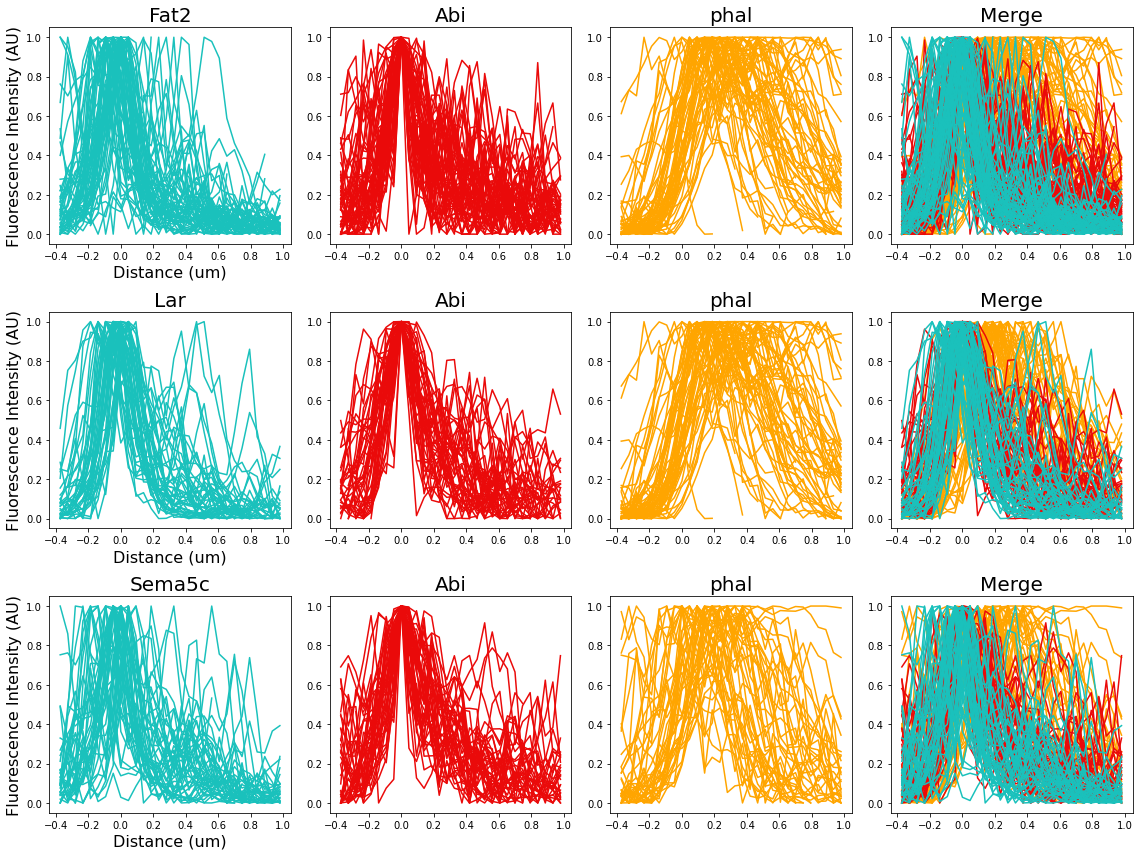

In [9]:
# Plot rescaled traces
fig, axs = plt.subplots(3,4,figsize=(16,12))
axs[0,0].plot(positions_um_cropped,arr_rescaled[:,:,0], c_Fat2)
axs[0,0].set_title("Fat2", fontsize=20)
axs[0,0].set_xlabel("Distance (um)", fontsize=16)
axs[0,0].set_ylabel("Fluorescence Intensity (AU)", fontsize=16)
axs[0,1].plot(positions_um_cropped,arr_rescaled[:,:,1], c_Abi)
axs[0,1].set_title("Abi", fontsize=20)
axs[0,2].plot(positions_um_cropped,arr_rescaled[:,:,2], c_phal_line)
axs[0,2].set_title("phal", fontsize=20)
axs[0,3].plot(positions_um_cropped,arr_rescaled[:,:,2], c_phal_line)
axs[0,3].plot(positions_um_cropped,arr_rescaled[:,:,1], c_Abi)
axs[0,3].plot(positions_um_cropped,arr_rescaled[:,:,0], c_Fat2)
axs[0,3].set_title("Merge", fontsize=20)

axs[1,0].plot(positions_um_cropped,arr_rescaled[:,:,3], c_Lar)
axs[1,0].set_title("Lar", fontsize=20)
axs[1,0].set_xlabel("Distance (um)", fontsize=16)
axs[1,0].set_ylabel("Fluorescence Intensity (AU)", fontsize=16)
axs[1,1].plot(positions_um_cropped,arr_rescaled[:,:,4], c_Abi)
axs[1,1].set_title("Abi", fontsize=20)
axs[1,2].plot(positions_um_cropped,arr_rescaled[:,:,2], c_phal_line)
axs[1,2].set_title("phal", fontsize=20)
axs[1,3].plot(positions_um_cropped,arr_rescaled[:,:,5], c_phal_line)
axs[1,3].plot(positions_um_cropped,arr_rescaled[:,:,4], c_Abi)
axs[1,3].plot(positions_um_cropped,arr_rescaled[:,:,3], c_Lar)
axs[1,3].set_title("Merge", fontsize=20)

axs[2,0].plot(positions_um_cropped,arr_rescaled[:,:,6], c_Sema5c)
axs[2,0].set_title("Sema5c", fontsize=20)
axs[2,0].set_xlabel("Distance (um)", fontsize=16)
axs[2,0].set_ylabel("Fluorescence Intensity (AU)", fontsize=16)
axs[2,1].plot(positions_um_cropped,arr_rescaled[:,:,7], c_Abi)
axs[2,1].set_title("Abi", fontsize=20)
axs[2,2].plot(positions_um_cropped,arr_rescaled[:,:,8], c_phal_line)
axs[2,2].set_title("phal", fontsize=20)
axs[2,3].plot(positions_um_cropped,arr_rescaled[:,:,8], c_phal_line)
axs[2,3].plot(positions_um_cropped,arr_rescaled[:,:,7], c_Abi)
axs[2,3].plot(positions_um_cropped,arr_rescaled[:,:,6], c_Sema5c)
axs[2,3].set_title("Merge", fontsize=20)

plt.tight_layout()

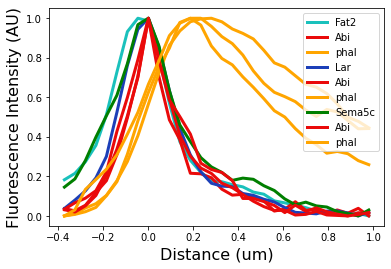

In [10]:
# Calculate the mean of each channel, then rescale
arr_avg = np.nanmean(aligned_arr_cropped,1)
arr_avg_rescale = np.empty_like(arr_avg)
arr_avg_rescale[:] = np.NaN

for j in range(len(arr_avg[0,:])):
    channel_min = np.nanmin(arr_avg[:,j])
    channel_max = np.nanmax(arr_avg[:,j])

    for i in range(len(arr_avg[:,0])):
        rescaled = (arr_avg[i,j] - channel_min
                   ) / (channel_max - channel_min)
        arr_avg_rescale[i,j] = rescaled
        
# Intensities rescaled post-averaging
plt.plot(positions_um_cropped,arr_avg_rescale[:,0],
         c_Fat2, linewidth = 3, label = "Fat2")
plt.plot(positions_um_cropped,arr_avg_rescale[:,1], 
         c_Abi, linewidth = 3,label = "Abi")
plt.plot(positions_um_cropped,arr_avg_rescale[:,2], 
         c_phal_line, linewidth = 3,label = "phal")

plt.plot(positions_um_cropped,arr_avg_rescale[:,3],
         c_Lar_alt, linewidth = 3, label = "Lar")
plt.plot(positions_um_cropped,arr_avg_rescale[:,4], 
         c_Abi, linewidth = 3,label = "Abi")
plt.plot(positions_um_cropped,arr_avg_rescale[:,5], 
         c_phal_line, linewidth = 3,label = "phal")

plt.plot(positions_um_cropped,arr_avg_rescale[:,6],
         c_Sema5c_alt, linewidth = 3, label = "Sema5c")
plt.plot(positions_um_cropped,arr_avg_rescale[:,7], 
         c_Abi, linewidth = 3,label = "Abi")
plt.plot(positions_um_cropped,arr_avg_rescale[:,8], 
         c_phal_line, linewidth = 3,label = "phal")

plt.xlabel("Distance (um)", fontsize=16)
plt.ylabel("Fluorescence Intensity (AU)", fontsize=16)
plt.legend()

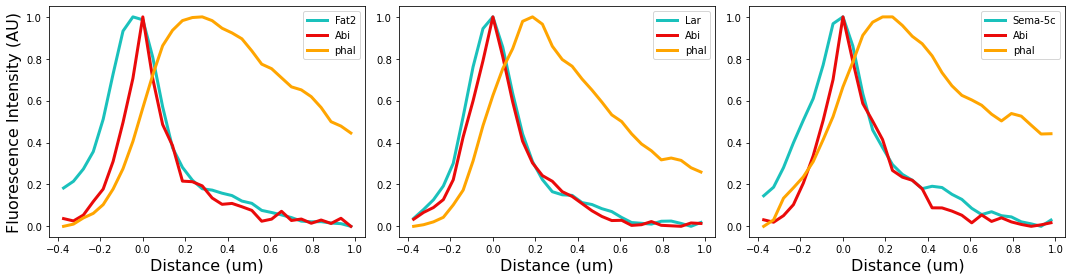

In [11]:
# Calculate the mean of each channel, then rescale
arr_avg = np.nanmean(aligned_arr_cropped,1)
arr_avg_rescale = np.empty_like(arr_avg)
arr_avg_rescale[:] = np.NaN

for j in range(len(arr_avg[0,:])):
    channel_min = np.nanmin(arr_avg[:,j])
    channel_max = np.nanmax(arr_avg[:,j])

    for i in range(len(arr_avg[:,0])):
        rescaled = (arr_avg[i,j] - channel_min
                   ) / (channel_max - channel_min)
        arr_avg_rescale[i,j] = rescaled
    
# Intensities rescaled post-averaging
fig, axs = plt.subplots(1,3, figsize=(15,4))
axs[0].plot(positions_um_cropped,arr_avg_rescale[:,0],
         c_Fat2, linewidth = 3, label = "Fat2")
axs[0].plot(positions_um_cropped,arr_avg_rescale[:,1], 
         c_Abi, linewidth = 3,label = "Abi")
axs[0].plot(positions_um_cropped,arr_avg_rescale[:,2], 
         c_phal_line, linewidth = 3,label = "phal")
axs[0].set_xlabel("Distance (um)", fontsize=16)
axs[0].set_ylabel("Fluorescence Intensity (AU)", fontsize=16)
axs[0].legend()

axs[1].plot(positions_um_cropped,arr_avg_rescale[:,3],
         c_Lar, linewidth = 3, label = "Lar")
axs[1].plot(positions_um_cropped,arr_avg_rescale[:,4], 
         c_Abi, linewidth = 3,label = "Abi")
axs[1].plot(positions_um_cropped,arr_avg_rescale[:,5], 
         c_phal_line, linewidth = 3,label = "phal")
axs[1].set_xlabel("Distance (um)", fontsize=16)
axs[1].legend()

axs[2].plot(positions_um_cropped,arr_avg_rescale[:,6],
         c_Sema5c, linewidth = 3, label = "Sema-5c")
axs[2].plot(positions_um_cropped,arr_avg_rescale[:,7], 
         c_Abi, linewidth = 3,label = "Abi")
axs[2].plot(positions_um_cropped,arr_avg_rescale[:,8], 
         c_phal_line, linewidth = 3,label = "phal")
axs[2].set_xlabel("Distance (um)", fontsize=16)
axs[2].legend()

plt.tight_layout()

In [12]:
def plot_protrusion_profile_lab(intensities, stds, ch_inds, colors, labels):
    # ch_inds_ls is a list of 3 indices, the datasets to plot, in the same order as the colors_ls
    # colors_ls is a list of tuples of colors- first ch line and fill, then second, then third
    
    # Set params
    line_width = 4
    spine_width = 2
    ax_lab_font_size = 18
    tick_lab_font_size = 14
    ylim = (-0.3, 0.8)
    
    fig, ax = plt.subplots(figsize=(2,8))
    
    # Plot mean and standard deviation
    ax.plot(intensities[:,ch_inds[2]], positions_um_cropped, 
        colors[2][0], linewidth=line_width, label=labels[2])
    ax.fill_betweenx(positions_um_cropped, 
                     intensities[:,ch_inds[2]]-stds[:,ch_inds[2]], 
                     intensities[:,ch_inds[2]]+stds[:,ch_inds[2]], 
                     color=colors[2][1], alpha=0.3)
    ax.plot(intensities[:,ch_inds[1]], positions_um_cropped, 
        colors[1][0], linewidth=line_width, label=labels[1])
    ax.fill_betweenx(positions_um_cropped, 
                     intensities[:,ch_inds[1]]-stds[:,ch_inds[1]], 
                     intensities[:,ch_inds[1]]+stds[:,ch_inds[1]], 
                     color=colors[1][1], alpha=0.3)
    ax.plot(intensities[:,ch_inds[0]], positions_um_cropped, 
        colors[0][0], linewidth=line_width, label=labels[0])
    ax.fill_betweenx(positions_um_cropped, 
                     intensities[:,ch_inds[0]]-stds[:,ch_inds[0]], 
                     intensities[:,ch_inds[0]]+stds[:,ch_inds[0]], 
                     color=colors[0][1], alpha=0.3)
    
    # Adjust axes, ticks, labels
    ax.set_ylim(ylim[0],ylim[1])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(spine_width)
    ax.spines['bottom'].set_linewidth(spine_width)
    ax.tick_params(axis='both', width=spine_width, length=spine_width*3, labelsize=tick_lab_font_size)
    ax.set_xticks([0,1])
    ax.set_yticks([0,ylim[1]])
    ax.set_xlabel("Fluorescence intensity (AU)", fontsize=ax_lab_font_size)
    ax.set_ylabel("Position along filopodium($\mu$m)", fontsize=ax_lab_font_size)
    ax.legend(fontsize=ax_lab_font_size, loc='best', bbox_to_anchor=(0.5, 0.5, 1, 0.5))

    
def plot_protrusion_profile_unlab(intensities, stds, ch_inds, colors, labels):
    # ch_inds_ls is a list of 3 indices, the datasets to plot, in the same order as the colors_ls
    # colors_ls is a list of tuples of colors- first ch line and fill, then second, then third
    
    # Set params
    line_width = 4
    spine_width = 2
    ax_lab_font_size = 18
    tick_lab_font_size = 14
    ylim = (-0.3, 0.8)
    
    fig, ax = plt.subplots(figsize=(2,8))
    
    # Plot mean and standard deviation
    ax.plot(intensities[:,ch_inds[2]], positions_um_cropped, 
        colors[2][0], linewidth=line_width, label=labels[2])
    ax.fill_betweenx(positions_um_cropped, 
                     intensities[:,ch_inds[2]]-stds[:,ch_inds[2]], 
                     intensities[:,ch_inds[2]]+stds[:,ch_inds[2]], 
                     color=colors[2][1], alpha=0.3)
    ax.plot(intensities[:,ch_inds[1]], positions_um_cropped, 
        colors[1][0], linewidth=line_width, label=labels[1])
    ax.fill_betweenx(positions_um_cropped, 
                     intensities[:,ch_inds[1]]-stds[:,ch_inds[1]], 
                     intensities[:,ch_inds[1]]+stds[:,ch_inds[1]], 
                     color=colors[1][1], alpha=0.3)
    ax.plot(intensities[:,ch_inds[0]], positions_um_cropped, 
        colors[0][0], linewidth=line_width, label=labels[0])
    ax.fill_betweenx(positions_um_cropped, 
                     intensities[:,ch_inds[0]]-stds[:,ch_inds[0]], 
                     intensities[:,ch_inds[0]]+stds[:,ch_inds[0]], 
                     color=colors[0][1], alpha=0.3)
    
    # Adjust axes, ticks, labels
    ax.set_ylim(ylim[0],ylim[1])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(spine_width)
    ax.spines['bottom'].set_linewidth(spine_width)
    ax.tick_params(axis='both', width=spine_width, length=spine_width*3)
    ax.set_xticks([0,1])
    ax.set_yticks([0,ylim[1]])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
    # Remove labels
    ax.get_xaxis().set_ticklabels([])
    ax.get_yaxis().set_ticklabels([])
    ax.set_yticks([])

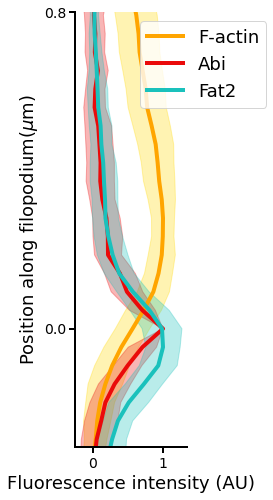

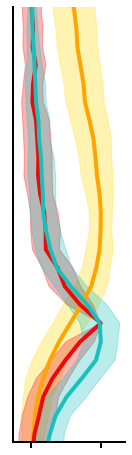

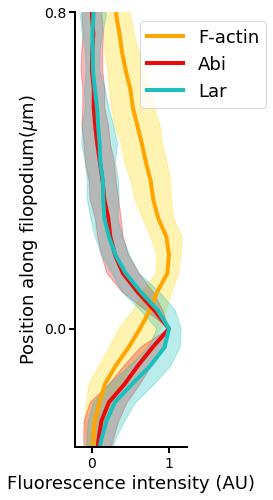

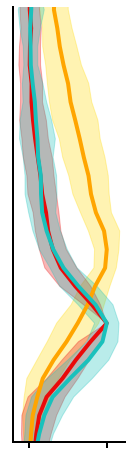

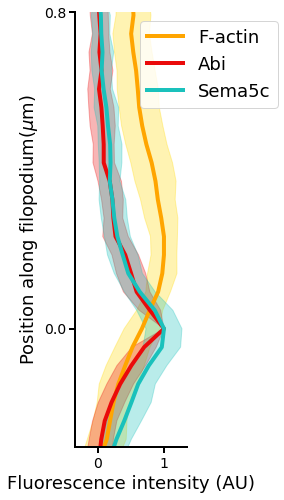

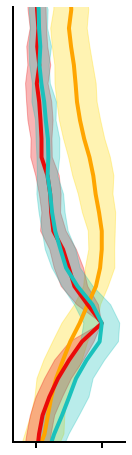

In [13]:
colors = [(c_Fat2, c_Fat2), (c_Abi, c_Abi), (c_phal_line, c_phal_fill)]
ch_inds = [0,1,2]
labels = ["Fat2", "Abi", "F-actin"]

plot_protrusion_profile_lab(arr_avg_rescale, std, ch_inds, colors, labels)
if OUTPUT_PLOT == True:
    out_path = PLOT_OUT_DIR  + f'protrusion_profile_{labels[0]}_{labels[1]}_{labels[2]}.pdf'
    plt.savefig(out_path, bbox_inches='tight')
    
plot_protrusion_profile_unlab(arr_avg_rescale, std, ch_inds, colors, labels)
if OUTPUT_PLOT == True:
    out_path = PLOT_OUT_DIR  + f'protrusion_profile_{labels[0]}_{labels[1]}_{labels[2]}_unlabeled.pdf'
    plt.savefig(out_path, bbox_inches='tight')

colors = [(c_Lar, c_Lar), (c_Abi, c_Abi), (c_phal_line, c_phal_fill)]
ch_inds = [3,4,5]
labels = ["Lar", "Abi", "F-actin"]

plot_protrusion_profile_lab(arr_avg_rescale, std, ch_inds, colors, labels)
if OUTPUT_PLOT == True:
    out_path = PLOT_OUT_DIR  + f'protrusion_profile_{labels[0]}_{labels[1]}_{labels[2]}.pdf'
    plt.savefig(out_path, bbox_inches='tight')
    
plot_protrusion_profile_unlab(arr_avg_rescale, std, ch_inds, colors, labels)
if OUTPUT_PLOT == True:
    out_path = PLOT_OUT_DIR  + f'protrusion_profile_{labels[0]}_{labels[1]}_{labels[2]}_unlabeled.pdf'
    plt.savefig(out_path, bbox_inches='tight')
    
colors = [(c_Sema5c, c_Sema5c), (c_Abi, c_Abi), (c_phal_line, c_phal_fill)]
ch_inds = [6,7,8]
labels = ["Sema5c", "Abi", "F-actin"]

plot_protrusion_profile_lab(arr_avg_rescale, std, ch_inds, colors, labels)
if OUTPUT_PLOT == True:
    out_path = PLOT_OUT_DIR  + f'protrusion_profile_{labels[0]}_{labels[1]}{labels[2]}.pdf'
    plt.savefig(out_path, bbox_inches='tight')
    
plot_protrusion_profile_unlab(arr_avg_rescale, std, ch_inds, colors, labels)
if OUTPUT_PLOT == True:
    out_path = PLOT_OUT_DIR  + f'protrusion_profile_{labels[0]}_{labels[1]}_{labels[2]}_unlabeled.pdf'
    plt.savefig(out_path, bbox_inches='tight')

## Make df of aligned array summary stats

In [14]:
df_summary_Fat2 = pd.DataFrame(positions_um_cropped, columns=["pos_um"])
df_summary_Fat2["Fat2_mean"] = arr_avg[:,0]
df_summary_Fat2["Abi_mean"] = arr_avg[:,1]
df_summary_Fat2["phal_mean"] = arr_avg[:,2]
df_summary_Fat2["Fat2_mean_rescale"] = arr_avg_rescale[:,0]
df_summary_Fat2["Abi_mean_rescale"] = arr_avg_rescale[:,1]
df_summary_Fat2["phal_mean_rescale"] = arr_avg_rescale[:,2]
df_summary_Fat2["Fat2_std_rescale"] = std[:,0]
df_summary_Fat2["Abi_std_rescale"] = std[:,1]
df_summary_Fat2["phal_std_rescale"] = std[:,2]

df_summary_Lar = pd.DataFrame(positions_um_cropped, columns=["pos_um"])
df_summary_Lar["Lar_mean"] = arr_avg[:,3]
df_summary_Lar["Abi_mean"] = arr_avg[:,4]
df_summary_Lar["phal_mean"] = arr_avg[:,5]
df_summary_Lar["Lar_mean_rescale"] = arr_avg_rescale[:,3]
df_summary_Lar["Abi_mean_rescale"] = arr_avg_rescale[:,4]
df_summary_Lar["phal_mean_rescale"] = arr_avg_rescale[:,5]
df_summary_Lar["Lar_std_rescale"] = std[:,3]
df_summary_Lar["Abi_std_rescale"] = std[:,4]
df_summary_Lar["phal_std_rescale"] = std[:,5]

df_summary_Sema5c = pd.DataFrame(positions_um_cropped, columns=["pos_um"])
df_summary_Sema5c["Sema5c_mean"] = arr_avg[:,6]
df_summary_Sema5c["Abi_mean"] = arr_avg[:,7]
df_summary_Sema5c["phal_mean"] = arr_avg[:,8]
df_summary_Sema5c["Sema5c_mean_rescale"] = arr_avg_rescale[:,6]
df_summary_Sema5c["Abi_mean_rescale"] = arr_avg_rescale[:,7]
df_summary_Sema5c["phal_mean_rescale"] = arr_avg_rescale[:,8]
df_summary_Sema5c["Sema5c_std_rescale"] = std[:,6]
df_summary_Sema5c["Abi_std_rescale"] = std[:,7]
df_summary_Sema5c["phal_std_rescale"] = std[:,8]

df_summary_Fat2.to_csv(path_or_buf = OUT_DIR + "distribution_average_Fat2.csv")
df_summary_Lar.to_csv(path_or_buf = OUT_DIR + "distribution_average_Lar.csv")
df_summary_Sema5c.to_csv(path_or_buf = OUT_DIR + "distribution_average_Sema5c.csv")
